In [14]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

from utils.model import hill_activation, hill_activation_single, hill_activation_and, random_search
from utils.helper import generate_data_at_t, \
                       get_blank_corrected, get_neg_ctrl_corrected, get_pos_ctrl_corrected, \
                        setup_header, read_map, generate_data, parse_data
from utils.plotter import plot_heatmap

import warnings
warnings.filterwarnings('ignore')

In [7]:
folder = '023-intact-vs-split-ecfs-rep2'
data = generate_data_at_t(folder, 'raw', 'plate_map', kind='2-input induction matrix', h=7, pos_ctrl_map=[(0, 1)])

[('A', 'sample'), ('B', 'positive')]


In [31]:
arr = []
for i in range(0, 45, 6):
    arr.append(data[0][i:i+6].tolist())
df = pd.DataFrame(arr).T
df.columns = ['E722', 'G722', 'E723', 'G723', 'E724', 'G724', 'E725', 'G725']
data1 = df[['E722', 'E723', 'E724', 'E725']]
data2 = df[['G722', 'G723', 'G724', 'G725']]

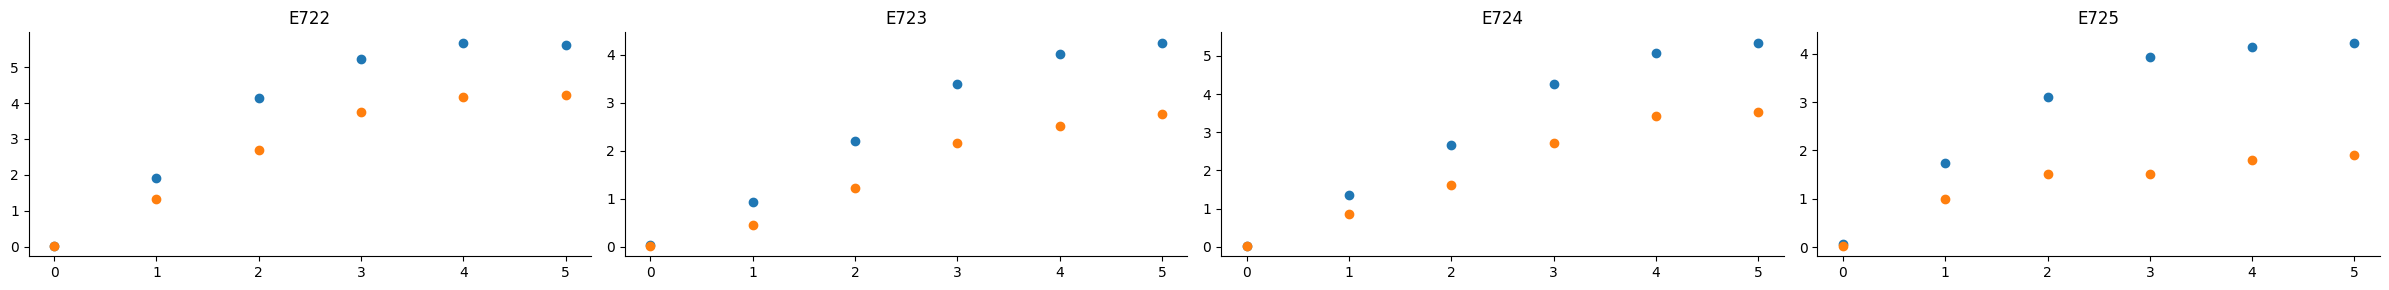

In [38]:
row, col = 1, 4
f, axs = plt.subplots(row, col, sharex=False, sharey=False, figsize=(col*6, row*3))
axr = axs.ravel()
for i, ax in enumerate(axr):
    if i < data1.shape[1]:
        ax.scatter(np.arange(6), data1.iloc[:, i])
        ax.scatter(np.arange(6), data2.iloc[:, i])
        #ax.set_xlabel(xlabel)
        #ax.set_ylabel(ylabel)
        #ax.loglog()
        ax.set_title(data1.columns[i])
    else:
        ax.set_visible(False)
plt.tight_layout()
sns.despine()

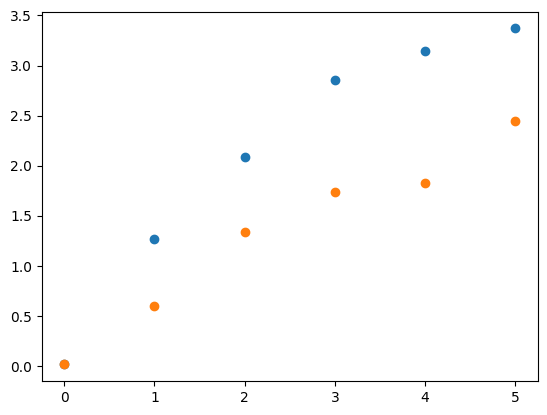

In [20]:
plt.scatter(np.arange(6), [0.017704, 1.267282, 2.089520, 2.859278, 3.149944, 3.370197])
plt.scatter(np.arange(6), [0.024739, 0.603365, 1.342184, 1.740143, 1.828285, 2.451512])

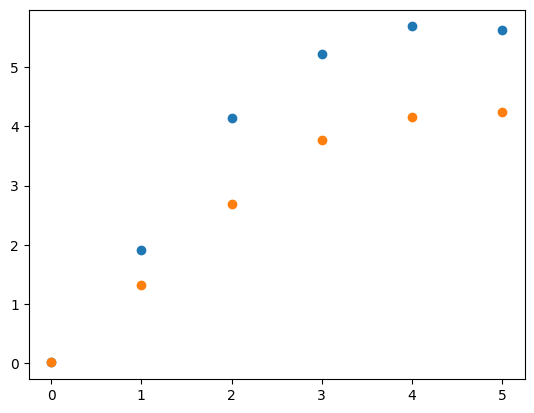

In [19]:
plt.scatter(np.arange(6), [0.014831, 1.916271, 4.138289, 5.213887, 5.684921, 5.628054])
plt.scatter(np.arange(6), [0.014987, 1.314898, 2.692324, 3.762887, 4.160704, 4.236819])

In [ ]:
raw_data = setup_header(pd.read_csv('datasets/experiment/{}/{}.csv'.format(folder, 'raw'), header=None))
sample_map = read_map(pd.read_csv('datasets/experiment/{}/{}.csv'.format(folder, 'plate_map')))

In [ ]:
raw_data = pd.read_csv('datasets/experiment/{}/{}.csv'.format(folder, 'raw'))
'Group' in raw_data.columns

In [ ]:
raw_data

In [ ]:
start_idx = 3
raw_data.columns = raw_data.columns.tolist()[:start_idx] + raw_data.iloc[0].tolist()[start_idx:]
raw_data.drop(0, inplace=True)
raw_data

In [ ]:
pd.isna(raw_data.iloc[0, 1]) or raw_data.iloc[0, 0]=='Well'

In [ ]:
raw_data.iloc[0, 1]